# Cross Validation

# End to End Machine Learning Project

    Steps to build any ML model

    1. Understanding the Problem / Look at the big Picture
    2. Get the Data
    3. Exploratory Data Analysis to Gain Insights from data
    4. Prepare Data for Machine Learning Algorithms 
    5. Select a Model and Train it
    6. Fine Tune your model
    7. Present your Solution
    8. Launch, Monitor, and Maintain your system

In [2]:
# EDA 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Working Directories, Files, and downloading data from URL
from pathlib import Path
from urllib import request
import os
import tarfile

# Data Sampling
from sklearn.model_selection import train_test_split
# Data Pipelines Transformation
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
# ML Models
from sklearn.linear_model import LinearRegression # ML model
from sklearn.svm import SVR # support vector machines (Support Vector Regressor)
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
# Model Evaluations
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
# Hyper Parameter Tunning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [4]:
housing = pd.read_csv("datasets/housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
X = housing.drop('median_house_value', axis=1)
y = housing['median_house_value']

In [10]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [12]:
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=42
                                                   )

In [16]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,INLAND


In [18]:
X_train.corrwith(y_train, numeric_only=True).sort_values(ascending=False, key=lambda v:abs(v))

median_income         0.690647
latitude             -0.142983
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
longitude            -0.046349
population           -0.026032
dtype: float64

In [25]:
# rooms per household
(X_train['total_rooms']/X_train['households']).corr(y_train)

0.15848486725499641

In [27]:
# bedrooms per household
(X_train['total_bedrooms']/X_train['households']).corr(y_train)

-0.05135098593689969

In [29]:
# Population per households
# rooms per household
(X_train['population']/X_train['households']).corr(y_train)

-0.022029958627558462

In [31]:
# lat lon some combo
(X_train['latitude']/X_train['longitude']).corr(y_train)

0.20765943946160814

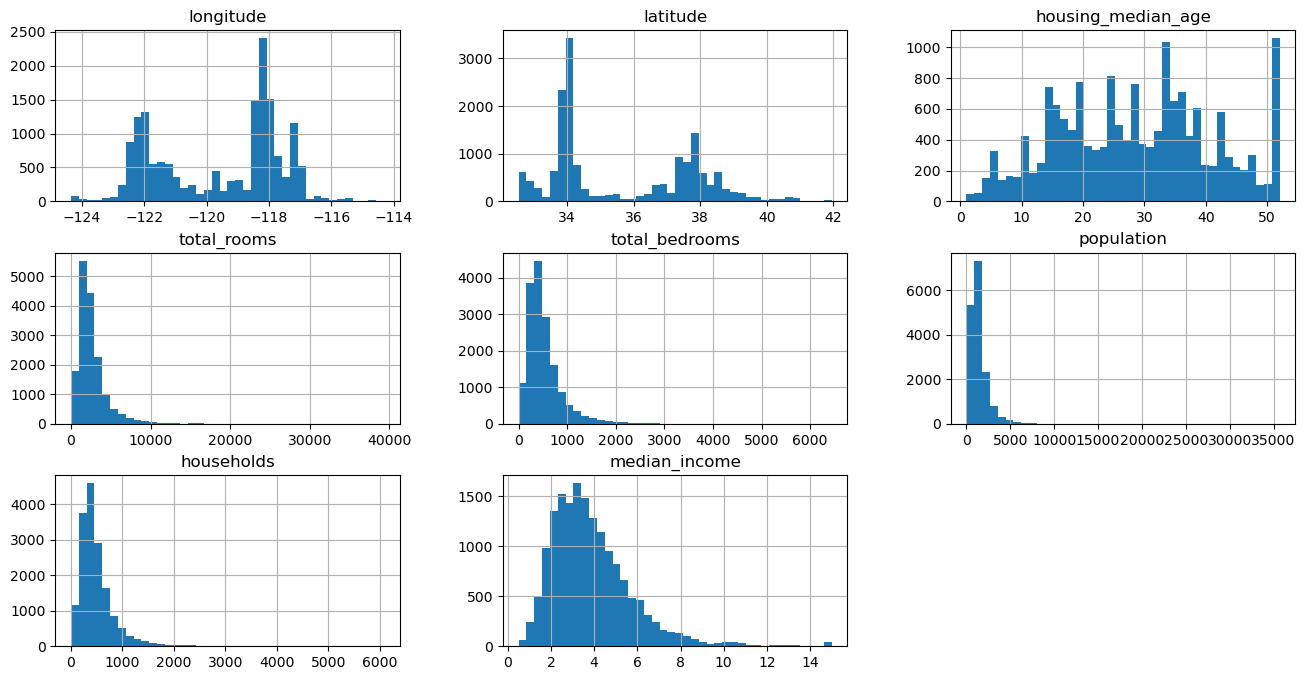

In [33]:
X_train.hist(bins=40, figsize=(16, 8))
plt.show()

## Preparing Data For ML models

In [36]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,INLAND


In [38]:
list(X_train.columns)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity']

In [56]:
num_features_without_outliers = ["longitude", "latitude", 'median_income']
num_features_with_outliers = ['housing_median_age', 'total_rooms', 'total_bedrooms',
                              'population', 'households']
cat_features = ["ocean_proximity"]
# Column Transformer
# outlier      -> Imputer -> log -> Scale
# non-outlier  -> Imputer -> Scale
# cat          -> Imputer -> One Hot Encoder
# new feature  -> Imputer -> new_column -> Scale

outlier_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    FunctionTransformer(np.log),
    StandardScaler())

without_outlier_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler())

cat_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder())

def raito(X, y=None):
    return X[:, [0]]/X[:, [1]]
    
add_feature = make_pipeline(
    SimpleImputer(strategy='median'),
    FunctionTransformer(raito),
    StandardScaler() )

inner_pipeline = ColumnTransformer([
    ("numerical with outliers", outlier_pipeline, num_features_with_outliers),
    ("numerical without outliers",  without_outlier_pipeline, num_features_without_outliers),
    ("categorical", cat_pipeline, cat_features),
    ("rooms per household", add_feature, ["total_rooms", "households"]),
    ("bedsrooms er households", add_feature, ["total_bedrooms", "households"]),
    
])



In [58]:
full_pipeline = Pipeline([
    ("pipeline", inner_pipeline), # prepare data for ML model
    ("model", LinearRegression()) # ML Model 
])


In [60]:
full_pipeline

Pipeline(steps=[('pipeline',
                 ColumnTransformer(transformers=[('numerical with outliers',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population',
                                                   'households']),
                                                 ('numerical witho...
                                                                   FunctionTransformer(func=<function raito at 0x30c69fc40>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['total_rooms',
                                                   'households']),
                                                 ('bedsrooms er households',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<function raito at 0x30c69fc40>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['total_bedrooms',
                                                   'households'])])),
                ('model', LinearRegression())])

In [62]:
full_pipeline.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 ColumnTransformer(transformers=[('numerical with outliers',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population',
                                                   'households']),
                                                 ('numerical witho...
                                                                   FunctionTransformer(func=<function raito at 0x30c69fc40>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['total_rooms',
                                                   'households']),
                                                 ('bedsrooms er households',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<function raito at 0x30c69fc40>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['total_bedrooms',
                                                   'households'])])),
                ('model', LinearRegression())])

## Evaluation 

Train Error, Validation Error (model evaluation and tunning), Test Error (Real World Accuracy)

if train error <<< test error / validation error ? overfitting (regularization, simple model)

if train error >>> very large ? underfitting (try to fit a complex model, hyper-parameter tunning, )

In [66]:
y_pred_train = full_pipeline.predict(X_train)

In [70]:
y_train[:5].to_numpy()

array([103000., 382100., 172600.,  93400.,  96500.])

In [72]:
y_pred_train[:5]

array([177536., 290944., 233600., 132288., 173696.])

In [74]:
abs(y_train[:5].to_numpy() - y_pred_train[:5])

array([74536., 91156., 61000., 38888., 77196.])

In [78]:
y_test[:5].to_numpy()[:5]

array([ 47700.,  45800., 500001., 218600., 278000.])

In [76]:
y_pred_test = full_pipeline.predict(X_test)
y_pred_test[:5]

array([ 56128., 112448., 211840., 256256., 262528.])

In [84]:
abs(y_test - y_pred_test)[:5].to_numpy()

array([  8428.,  66648., 288161.,  37656.,  15472.])

In [86]:
max(y_train)

500001.0

In [ ]:
# house price predict
# X_train  y_train     X_test y_test
# error = y_actual - y_pred

In [225]:
def evaluate(model, model_name):

    full_pipeline = Pipeline([
    ("pipeline", inner_pipeline), # prepare data for ML model
    ("model", model() ) # ML Model 
    ])

    full_pipeline.fit(X_train, y_train)
    
    print("\n")
    print(f"Model: {model_name.center(60)}")
    y_pred_train = full_pipeline.predict(X_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)
    percent_train_error = (rmse_train/y_train.mean())*100
    r2_score_train = r2_score(y_train, y_pred_train)*100
    print(f"RMSE Train: {rmse_train.round(2)} Train % Error: {percent_train_error.round(2)}%")
    print(f"Training Accuracy: {r2_score_train.round(2)} %")
    
    
    y_pred_test = full_pipeline.predict(X_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)
    percent_test_error = (rmse_test/y_test.mean())*100
    r2_score_test = r2_score(y_test, y_pred_test)*100
    print(f"\n\nRMSE Test: {rmse_test.round(2)} Test % Error: {percent_test_error.round(2)}%")
    print(f"Test Accuracy: {r2_score_test.round(2)} %")
    print()

# Model Selection 

    Try different ML models and figure out best Model to use for given problem set aka has less error 

In [118]:
def evaulate(models):
    performance = [] # {"name":"Linear Regression", "train error": 30000, "test error": 40000, "train accuray": 70, "test_accuracy": 50, }
    for model_name, model in models.items():
        full_pipeline = Pipeline([
            ("pipeline", inner_pipeline), # prepare data for ML model
            ("model", model() ) # ML Model
        ])
        # train Error Estimation
        print(f"Training Model {model_name}")
        full_pipeline.fit(X_train, y_train)
        y_train_hat = full_pipeline.predict(X_train)
        train_error = np.sqrt(mean_squared_error(y_train, y_train_hat))
        train_error_percent = (train_error / y_train.mean())*100
        train_acc = r2_score(y_train, y_train_hat)*100
        # Test Error Estimation
        y_test_hat = full_pipeline.predict(X_test)
        test_error = np.sqrt(mean_squared_error(y_test, y_test_hat))
        test_error_percent = (test_error / y_test.mean())*100
        test_acc = r2_score(y_test, y_test_hat)*100
        performance.append({
            "name": model_name,
            "train error": train_error.round(2),
            "train error%": train_error_percent.round(2),
            "train acc": train_acc.round(2),
            "test error": test_error.round(2),
            "test error%": test_error_percent.round(2),
            "test acc": test_acc.round(2),
        })

    print("_"*120)
    print(f"|{'Model Name':^40}|{'Train Error':^12}|{'Test Error':^12}|{'Train Error%':^12}|{'Test Error%':^12}|{'Train Acc':^10}|{'Test Acc':^10}|".center(100))
    # 8 pipes + 88 
    print("_"*120)
    for d in performance:
        print(f"|{d['name']:^40}|{d['train error']:^12}|{d['test error']:^12}|{d['train error%']:^12}|{d['test error%']:^12}|{d['train acc']:^10}|{d['test acc']:^10}|".center(100))
        print("-"*120)

In [120]:
models = {
    "Linear Regression": LinearRegression,
    "Decison Tree Regressor": DecisionTreeRegressor,
    "Support Vector Machines Regressor": SVR,
    "Random Forest Regressor": RandomForestRegressor
}

In [122]:
evaulate(models)

Training Model Linear Regression
Training Model Decison Tree Regressor
Training Model Support Vector Machines Regressor
Training Model Random Forest Regressor
________________________________________________________________________________________________________________________
|               Model Name               |Train Error | Test Error |Train Error%|Test Error% |Train Acc | Test Acc |
________________________________________________________________________________________________________________________
|           Linear Regression            |  65990.66  |  71768.72  |   31.85    |   34.92    |  67.42   |  60.69   |
------------------------------------------------------------------------------------------------------------------------
|         Decison Tree Regressor         |    0.0     |  72649.89  |    0.0     |   35.35    |  100.0   |  59.72   |
------------------------------------------------------------------------------------------------------------------------
|   Su

#### Cross Validation 

In [124]:
from sklearn.model_selection import cross_val_score

    greater is better in terms of score

In [149]:
model = Pipeline([
            ("pipeline", inner_pipeline), # prepare data for ML model
            ("model", RandomForestRegressor() ) # ML Model
        ])

In [152]:
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
scores = np.sqrt(-scores)

In [153]:
scores

array([49847.34867279, 50192.40816459, 49712.81073951, 49557.38812768,
       50458.31527822])

In [154]:
scores.mean()

49953.654196559466

## Hyper Parameter Tunning 

what are hyper-parameters ? 

    parameters set during model initilization, training depends on hyper-parameters

hyper_parameter 

    n_estimators =  100       200
    train error =  18347      18153
    test error  =  49777      49836


    n_estimators = 100    max_depth = 10      min_sampes_split = 100

    train error  52474
    test  error  57652

In [183]:
model = Pipeline([
            ("pipeline", inner_pipeline), # prepare data for ML model
            ("model", RandomForestRegressor(
                n_estimators=100, max_depth=15, min_samples_split=100,
                n_jobs=-1
            ) ) # ML Model
        ])

model.fit(X_train, y_train)
y_hat_train = model.predict(X_train)
train_error = np.sqrt(mean_squared_error(y_train, y_hat_train))
print("Train Error: ", train_error)
y_hat = model.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, y_hat))
print("Test Error: ", error)

Train Error:  50087.05545347766
Test Error:  56119.97826227327


In [185]:
error/y_train.mean()

0.27085625239644434

In [187]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
#                                 list              random generate

In [189]:
model.get_params()

{'memory': None,
 'steps': [('pipeline',
   ColumnTransformer(transformers=[('numerical with outliers',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('functiontransformer',
                                                     FunctionTransformer(func=<ufunc 'log'>)),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    ['housing_median_age', 'total_rooms',
                                     'total_bedrooms', 'population',
                                     'households']),
                                   ('numerical without outliers',
                                    Pipeline(steps=[...
                                                     FunctionTransformer(func=<function raito at 0x30c69

In [ ]:

model = Pipeline([
            ("pipeline", inner_pipeline), # prepare data for ML model
            ("model", RandomForestRegressor() # ML Model
        ])

In [199]:
param_grid = [
    {
        'pipeline__numerical without outliers__simpleimputer__strategy': ['median', 'mean'],
        'model__max_depth': [5, 10, 15, 20],
        'model__max_features': [1, 2, 3, 4, 5],
        'model__min_samples_split': [10, 20, 30, 50, 80, 100],
        'model__n_jobs': [-1]
    },
    # {
    #     'pipeline__numerical without outliers__simpleimputer__strategy': ['median', 'mean'],
    #     'model__max_depth': [15, 20],
    #     'model__max_features': [ 4, 5],
    #     'model__min_samples_split': [10, 20, 30],
    # },
    
]

In [201]:
grid_search = GridSearchCV(model, param_grid, cv=3, scoring="neg_root_mean_squared_error")

In [203]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pipeline',
                                        ColumnTransformer(transformers=[('numerical '
                                                                         'with '
                                                                         'outliers',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(func=<ufunc 'log'>)),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['housing_median_age',
                                                                          'total_rooms',
                                                                          'total_bedrooms',
                                                                          'population'...
                                                                          'households'])])),
                                       ('model',
                                        RandomForestRegressor(max_depth=15,
                                                              min_samples_split=100,
                                                              n_jobs=-1))]),
             param_grid=[{'model__max_depth': [5, 10, 15, 20],
                          'model__max_features': [1, 2, 3, 4, 5],
                          'model__min_samples_split': [10, 20, 30, 50, 80, 100],
                          'model__n_jobs': [-1],
                          'pipeline__numerical without outliers__simpleimputer__strategy': ['median',
                                                                                            'mean']}],
             scoring='neg_root_mean_squared_error')

In [ ]:
# Best Value for Hyper parameters based on neg_root_mean_squared error 

In [205]:
grid_search.best_params_

{'model__max_depth': 20,
 'model__max_features': 5,
 'model__min_samples_split': 10,
 'model__n_jobs': -1,
 'pipeline__numerical without outliers__simpleimputer__strategy': 'mean'}

best_model = RandomForestRegressor(model__max_depth= 20,
 model__max_features=  5,
 model__min_samples_split =  10,
 model__n_jobs= -1)

In [207]:
grid_search.best_estimator_

Pipeline(steps=[('pipeline',
                 ColumnTransformer(transformers=[('numerical with outliers',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population',
                                                   'households']),
                                                 ('numerical witho...
                                                   'households']),
                                                 ('bedsrooms er households',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<function raito at 0x30c69fc40>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['total_bedrooms',
                                                   'households'])])),
                ('model',
                 RandomForestRegressor(max_depth=20, max_features=5,
                                       min_samples_split=10, n_jobs=-1))])

In [211]:
grid_search.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_model__max_depth', 'param_model__max_features', 'param_model__min_samples_split', 'param_model__n_jobs', 'param_pipeline__numerical without outliers__simpleimputer__strategy', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [215]:
grid_search.cv_results_["mean_test_score"]

array([-85040.53186194, -84943.92256656, -84260.61742287, -84876.89203577,
       -83615.41974164, -83574.65434047, -84443.19176641, -84575.06219478,
       -83639.76562555, -84216.45068084, -84642.33368242, -85155.29931209,
       -75273.47441435, -75725.73317707, -75635.78433809, -75483.4543699 ,
       -75932.38506891, -75982.93613498, -76330.75823729, -75628.54731928,
       -75533.01932928, -75862.882064  , -75705.9961988 , -76068.16473335,
       -71409.3240573 , -71121.70077354, -71379.49018218, -71373.61469209,
       -71087.61621129, -71438.13672722, -70925.19541884, -71352.35449176,
       -71551.08399696, -71333.95726401, -71487.14910041, -71461.61737602,
       -69311.10522555, -69089.73302882, -68758.37795604, -68950.38019432,
       -69021.67783603, -68979.04233307, -68673.48178343, -69089.31872792,
       -69183.23061183, -69062.12558155, -69193.97631923, -69143.831453  ,
       -67825.70649615, -67724.72569667, -67899.23679121, -67619.94689176,
       -67597.8109717 , -